**Mount Drive**

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Files**

In [3]:
import os
import pandas as pd
import statistics
from statistics import *
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
import librosa
import librosa.display
import statistics
from statistics import *
import math
from scipy import spatial
import keras.backend as K
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense 

**Read File**

In [4]:
import pandas as pd
data = pd.read_csv('drive/My Drive/IRProject/finaldataset.csv')
data_g = pd.read_csv('drive/My Drive/IRProject/data_20s_all_genres.csv')

In [5]:
data.drop('Unnamed: 0',
  axis='columns', inplace=True)
data_g.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [6]:
find = data

In [7]:
print(len(find))

3889


**Train Test Split**

In [8]:
scaler = MinMaxScaler()
data_g = data_g.dropna()
X = data_g.iloc[:, 0:-1]
X_norm = scaler.fit_transform(X)
#X_norm = scaler.transform(X)
y = data_g.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)
testy = y_test

In [9]:
scaler = MinMaxScaler()
data = data.dropna()
X = data.iloc[:, 0:-2]
X_norm = scaler.fit_transform(X)
#X_norm = scaler.transform(X)
y = data.iloc[:, -2]

x_train1, x_test1, y_train1, y_test1 = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)

**Read Test File**

In [10]:
data1 = []
list1 = []
songData = []
y, sr = librosa.load('drive/My Drive/IRProject/rosa.mp3', mono=True, duration=20)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
songData.append(tempo)
songData.append(mean(beats))
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
songData.append(mean(chroma_stft.flatten()))
# rmse = librosa.feature.rmse(y=y)
rmse=librosa.feature.rms(y=y)[0]
songData.append(mean(rmse))
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
songData.append(mean(spec_cent.flatten()))
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
songData.append(mean(spec_bw.flatten()))
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
songData.append(mean(rolloff.flatten()))
zcr = librosa.feature.zero_crossing_rate(y)
songData.append(mean(zcr.flatten()))
# zcr1 = librosa.feature.zero_crossing_rate(y)
# songData.append(mean(zcr1.flatten()))
mfcc = librosa.feature.mfcc(y=y, sr=sr)
for i in mfcc:
  songData.append(np.mean(i))
  list1.append(np.mean(i))

data1.append(songData)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


**Genre Predictions**

Linear Regression

In [11]:
res = []
name = []

In [12]:
model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
acc = model.score(x_test,y_test)
acc1 = model.score(x_train,y_train)
y_score = model.predict(x_test)
print('testing accuracy',acc)
name.append('Linear Regression')
res.append(acc)

testing accuracy 0.6584821428571429


In [13]:
import matplotlib.pyplot as plt
total_relevant=0
precision_list=[]
recall_list=[]
total=0
current_relevant=0

for x,y in zip(y_test,y_score) :
    if x != y:
        total_relevant = total_relevant
    else:
        total_relevant+=1


for x,y in zip(y_test,y_score):
    total= total + 1
    if x!=y:
        current_relevant = current_relevant
    else:
        current_relevant+=1
    precision_list.append(current_relevant/total)
    recall_list.append(current_relevant/total_relevant)


In [14]:
print(len(y_test), len(y_score))

896 896


In [15]:
model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(x_train,y_train)
y_pred = model.predict(data1)

print(y_pred)

[4]


SVM with rbf kernel

In [16]:
model = SVC(kernel = 'rbf', random_state = 42, gamma = 'scale')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
acc = model.score(x_test,y_test)
acc1 = model.score(x_train,y_train)
y_score = model.predict(x_test)
print('testing accuracy',acc)
name.append('SVM with RBF Kernel')
res.append(acc)

testing accuracy 0.7823660714285714


In [17]:
import matplotlib.pyplot as plt
total_relevant=0
precision_list1=[]
recall_list1=[]
total=0
current_relevant=0

for x,y in zip(y_test,y_score) :
    if x != y:
        total_relevant = total_relevant
    else:
        total_relevant+=1


for x,y in zip(y_test,y_score):
    total= total + 1
    if x!=y:
        current_relevant = current_relevant
    else:
        current_relevant+=1
    precision_list1.append(current_relevant/total)
    recall_list1.append(current_relevant/total_relevant)


In [18]:
y_pred = model.predict(data1)
print(y_pred)

[4]


SVM with linear kernel

In [19]:
model = SVC(kernel = 'linear', random_state = 42, gamma = 'scale')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
acc = model.score(x_test,y_test)
acc1 = model.score(x_train,y_train)
print('testing accuracy',acc)

testing accuracy 0.6830357142857143


In [20]:
y_pred = model.predict(data1)
print(y_pred)

[3]


SVM with poly kernel

In [21]:
model = SVC(kernel = 'poly', degree = 2,random_state = 42, gamma = 'scale')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
acc = model.score(x_test,y_test)
acc1 = model.score(x_train,y_train)
print('testing accuracy',acc)
name.append('SVM with Poly Kernel')
res.append(acc)

testing accuracy 0.7444196428571429


In [22]:
y_pred = model.predict(data1)
print(y_pred)

[4]


SVM with sigmoid kernel

In [23]:
from sklearn.svm import SVC

model = SVC(kernel = 'sigmoid', random_state = 42, gamma = 'scale')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
acc = model.score(x_test,y_test)
acc1 = model.score(x_train,y_train)
print('testing accuracy',acc)
name.append('SVM with Sigmoid Kernel')
res.append(acc)

testing accuracy 0.18080357142857142


In [24]:
y_pred = model.predict(data1)
print(y_pred)

[3]


Decision Tree with Entropy

In [25]:
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
acc = model.score(x_test,y_test)
acc1 = model.score(x_train,y_train)
print('testing accuracy',acc)
name.append('Decision Tree with Entropy')
res.append(acc)

testing accuracy 0.5357142857142857


In [26]:
y_pred = model.predict(data1)
print(y_pred)

[0]


Decision Tree with Gini

In [27]:
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
acc = model.score(x_test,y_test)
acc1 = model.score(x_train,y_train)
print('testing accuracy',acc)
y_score = model.predict(x_test)
name.append('Decision Tree with Gini')
res.append(acc)

testing accuracy 0.6919642857142857


In [28]:
import matplotlib.pyplot as plt
total_relevant=0
precision_list2=[]
recall_list2=[]
total=0
current_relevant=0

for x,y in zip(y_test,y_score) :
    if x != y:
        total_relevant = total_relevant
    else:
        total_relevant+=1


for x,y in zip(y_test,y_score):
    total= total + 1
    if x!=y:
        current_relevant = current_relevant
    else:
        current_relevant+=1
    precision_list2.append(current_relevant/total)
    recall_list2.append(current_relevant/total_relevant)


In [29]:
y_pred = model.predict(data1)
print(y_pred)

[2]


KNN

In [30]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
acc = model.score(x_test,y_test)
acc1 = model.score(x_train,y_train)
y_score1 = model.predict(x_test)
print('testing accuracy',acc)
name.append('KNN')
res.append(acc)

testing accuracy 0.8448660714285714


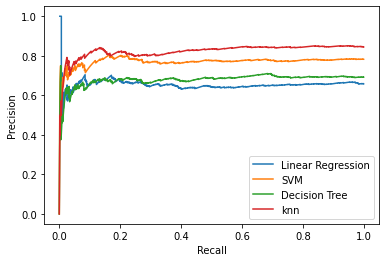

In [31]:
import matplotlib.pyplot as plt
total_relevant=0
precision_list3=[]
recall_list3=[]
total=0
current_relevant=0

for x,y in zip(y_test,y_score1) :
    if x != y:
        total_relevant = total_relevant
    else:
        total_relevant+=1


for x,y in zip(y_test,y_score1):
    total= total + 1
    if x!=y:
        current_relevant = current_relevant
    else:
        current_relevant+=1
    precision_list3.append(current_relevant/total)
    recall_list3.append(current_relevant/total_relevant)
    
plt.plot(recall_list,precision_list,label='Linear Regression')
plt.plot(recall_list1,precision_list1,label='SVM')
plt.plot(recall_list2,precision_list2,label='Decision Tree')
plt.plot(recall_list3,precision_list3,label='knn')
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [32]:
y_pred = model.predict(data1)
print(y_pred)

[1]


Neural Network

In [33]:
scaler = MinMaxScaler()
data = find.dropna()
data_test = x_test
X = data.iloc[:, 0:-2]
X_norm = scaler.fit_transform(X)
#X_norm = scaler.transform(X)
y = data.iloc[:, -2]
x_test = data_test
x_test = scaler.fit_transform(x_test)
y_test = y_test
#x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 0)
from keras.utils import to_categorical
y = to_categorical(y)
y_test = to_categorical(y_test)

In [34]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=28))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=5, activation='softmax'))
sgd = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(X_norm,y,batch_size=10,epochs=150)
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))
name.append('Neural Network')
res.append(scores[1])

Epoch 1/150
389/389 [==============================] - 1s 975us/step - loss: 1.6119 - accuracy: 0.1858
Epoch 2/150
389/389 [==============================] - 0s 1ms/step - loss: 1.6035 - accuracy: 0.2380
Epoch 3/150
389/389 [==============================] - 0s 1ms/step - loss: 1.5961 - accuracy: 0.2617
Epoch 4/150
389/389 [==============================] - 0s 1ms/step - loss: 1.5951 - accuracy: 0.2417
Epoch 5/150
389/389 [==============================] - 0s 1ms/step - loss: 1.5871 - accuracy: 0.2584
Epoch 6/150
389/389 [==============================] - 0s 998us/step - loss: 1.5767 - accuracy: 0.2704
Epoch 7/150
389/389 [==============================] - 0s 1ms/step - loss: 1.5688 - accuracy: 0.2557
Epoch 8/150
389/389 [==============================] - 0s 1ms/step - loss: 1.5622 - accuracy: 0.2637
Epoch 9/150
389/389 [==============================] - 0s 1ms/step - loss: 1.5600 - accuracy: 0.2633
Epoch 10/150
389/389 [==============================] - 0s 1ms/step - loss: 1.5535 - ac

In [35]:
df = pd.DataFrame(list(zip(name, res)), columns =['Models', 'Accuracy'])

In [36]:
df

,Models,Accuracy
0,Linear Regression,0.658482
1,SVM with RBF Kernel,0.782366
2,SVM with Poly Kernel,0.744420
3,SVM with Sigmoid Kernel,0.180804
4,Decision Tree with Entropy,0.535714
5,Decision Tree with Gini,0.691964
6,KNN,0.844866
7,Neural Network,0.455357


**Recommendation**

Euclidean Distance

In [37]:
pip install dtw

In [38]:
from dtw import dtw

In [39]:
euc_dist = []
for i in range(len(x_train1)):
  x = np.array(data1[0]).reshape(-1,1)
  y = np.array(x_train1[i]).reshape(-1,1)
  d = np.linalg.norm(x-y)
  euc_dist.append(d)
print("The normalized distance between the two : ",euc_dist)

The normalized distance between the two :  [5470.2354739502725, 5470.503889447645, 5471.009225370907, 5470.867085835384, 5470.637840431804, 5470.801775227456, 5470.572662935477, 5470.810439885881, 5470.671828297006, 5470.908467474122, 5471.020415270192, 5470.994080886685, 5470.754498574656, 5470.8933008468175, 5470.887493960557, 5470.8720544307425, 5471.15835903849, 5470.783099512444, 5471.045262309837, 5470.656187475087, 5470.772532156292, 5470.940512006319, 5470.330073687593, 5470.884903206368, 5470.678316443901, 5470.877122482613, 5470.428355987402, 5470.882407344777, 5470.814814802659, 5470.637961884323, 5470.845433074308, 5471.011302341932, 5471.156992156002, 5470.504706324809, 5471.122592910101, 5470.6359841220665, 5470.846602652352, 5470.593516006684, 5470.568013849792, 5470.942044012224, 5470.8460474745225, 5470.564595914123, 5470.8154017761335, 5470.515016659021, 5471.051598980997, 5470.910369555181, 5470.911287680453, 5470.568154486797, 5470.823072056003, 5471.165352238773, 5

In [40]:
euc_df = pd.DataFrame()
euc_df['Euclidean'] = euc_dist
euc_df['file'] = find.iloc[:,-1]


In [41]:
selected_file_euc = euc_df.nlargest(5, ['Euclidean'])

In [42]:
recommended_list = []
for file_name in selected_file_euc['file']:
  recommended_list.append(os.path.basename(file_name))
recommended_list

['song_folk2.mp3',
 'Chad_Crouch_-_Very.mp3',
 'Mid-Air_Machine_-_Ampheral__Text_Notification.mp3',
 'song_folk4.mp3',
 'Chad_Crouch_-_Hot_Pink.mp3']

In [43]:
selected_file_euc['file'] = recommended_list
selected_file_euc

,Euclidean,file
2524,5471.466410,song_folk2.mp3
384,5471.413596,Chad_Crouch_-_Very.mp3
2988,5471.403677,Mid-Air_Machine_-_Ampheral__Text_Notification.mp3
1786,5471.396495,song_folk4.mp3
427,5471.387993,Chad_Crouch_-_Hot_Pink.mp3


Cosine Similarity

In [44]:
result = []
for i in range(len(x_train1)):
  dataSetI = x_train1[i]
  dataSetII = data1
  result.append(1 - spatial.distance.cosine(dataSetI, dataSetII))

In [45]:
xtr = sorted(result,reverse =True)
print(xtr)

[0.5320593344881477, 0.5294100727877509, 0.5089358729989432, 0.5088847010709693, 0.5086177799263042, 0.5084612364044235, 0.5081188947936821, 0.5076952407695859, 0.5075498584927877, 0.505858045501322, 0.5052256665049456, 0.5038993194893401, 0.49729884375986755, 0.49512930630420693, 0.4939065693315534, 0.4915449748369918, 0.49135426671761817, 0.4909211717879396, 0.48791117817746854, 0.4849789671809762, 0.4751629315492786, 0.47404891732558496, 0.4719073585917247, 0.46981915136101726, 0.4677457012944348, 0.4672199508422744, 0.46531691775545436, 0.46310763741458405, 0.46243368531537654, 0.46213960239004503, 0.461178256612794, 0.4593958675008246, 0.4587831936636597, 0.457773911314427, 0.4574922618869506, 0.45747904573244746, 0.45710332732194514, 0.4567386108837026, 0.4565810951082041, 0.4551719533737226, 0.4546594862857525, 0.4538072450920625, 0.4537705302449174, 0.4535408483309573, 0.45208285322603237, 0.45148355341238444, 0.45082289274130083, 0.4505754449360795, 0.4496807731735243, 0.44957

In [46]:
cosine_df = pd.DataFrame()
cosine_df['cosine'] = result
cosine_df['file'] = find.iloc[:,-1]


In [47]:
selected_file = cosine_df.nlargest(5, ['cosine'])

In [48]:
recommended_list = []
for file_name in selected_file['file']:
  recommended_list.append(os.path.basename(file_name))
recommended_list

['Vincent_Augustus_-_chonk.mp3',
 'Cryosyncopy_-_06_-_Flaying_with_Fire.mp3',
 '01_-_Until_We_Get_By.mp3',
 'qKhlm3GJ6VWR6s8xBQhXrJ18szrxTBx0FTI3KWAw.mp3',
 'Checkie_Brown_-_04_-_Hippie_Bulle_-_Stoned_Funghi_ID_213.mp3']

In [49]:
selected_cosine_file  = []
for i in range(5):
  selected_cosine_file.append(os.path.basename(selected_file.iloc[i,-1]))

selected_file['file'] = recommended_list

In [50]:
selected_file

,cosine,file
1051,0.532059,Vincent_Augustus_-_chonk.mp3
3054,0.529410,Cryosyncopy_-_06_-_Flaying_with_Fire.mp3
2278,0.508936,01_-_Until_We_Get_By.mp3
2079,0.508885,qKhlm3GJ6VWR6s8xBQhXrJ18szrxTBx0FTI3KWAw.mp3
786,0.508618,Checkie_Brown_-_04_-_Hippie_Bulle_-_Stoned_Fun...


Manhattan Distance

In [51]:
model_man = NearestNeighbors(metric = 'manhattan', algorithm = 'brute')
model_man.fit(x_train)
query_index = data1
distances, indices = model_man.kneighbors(data1, n_neighbors = 6)
manhattan = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), 
                  key=lambda x: x[1])[:0:-1]

In [52]:
print(manhattan[0][1])

9634.725221650579


In [53]:
selected_manhattan_ind = []
selected_manhattan_val = []
for i in range(0,5):
  selected_manhattan_ind.append(manhattan[i][0])
  selected_manhattan_val.append(manhattan[i][1])

In [54]:
selected_manhattan_file = []
for i in selected_manhattan_ind:
  selected_manhattan_file.append(os.path.basename(find.iloc[i][29]))
selected_manhattan_file

['song_rock26.mp3',
 'song_folk7.mp3',
 'song_folk19.mp3',
 'fcFBh9648gcBxN2f811b1b8PMenVcZIU42Ph0vp2.mp3',
 'song_hip42.mp3']

In [55]:
manhattan_op = pd.DataFrame()
manhattan_op['Manhattan Distance'] = selected_manhattan_val
manhattan_op['File'] = selected_manhattan_file
manhattan_op

,Manhattan Distance,File
0,9634.725222,song_rock26.mp3
1,9634.711696,song_folk7.mp3
2,9634.695896,song_folk19.mp3
3,9634.685807,fcFBh9648gcBxN2f811b1b8PMenVcZIU42Ph0vp2.mp3
4,9634.683553,song_hip42.mp3


KNN

In [56]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(x_train)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [57]:
query_index = data1
distances, indices = model_knn.kneighbors(data1, n_neighbors = 23)

In [58]:
knn = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), 
                  key=lambda x: x[1])[:0:-1]

In [59]:
print(knn)

[(1070, 0.49197882662362113), (2031, 0.49196078945604793), (49, 0.49172323629859915), (503, 0.4917139332410241), (223, 0.4916563055569638), (3309, 0.4915721789149551), (3132, 0.4915579271386079), (609, 0.491442168759037), (2328, 0.4913787338949466), (2175, 0.49136889956873175), (3443, 0.49134460379577616), (1162, 0.4913006061169659), (483, 0.4911103558209018), (2615, 0.49105267770789207), (982, 0.4909977058061562), (803, 0.4909423331909796), (969, 0.4909056271967296), (1372, 0.49071951647764844), (594, 0.4906306864714409), (542, 0.4905479049773158), (1424, 0.49026053445654516), (1813, 0.4892712254631466)]


In [60]:
selected_knn_ind = []
selected_knn_val = []
for i in range(0,5):
  selected_knn_ind.append(knn[i][0])
  selected_knn_val.append(knn[i][1])

In [61]:
selected_knn_file = []
for i in selected_knn_ind:
  selected_knn_file.append(os.path.basename(find.iloc[i][29]))
selected_knn_file

['Audiobinger_-_Enchanted_Forest.mp3',
 '9jWyFp6sbcI1xZxfecT8AYYvOfXqQ7sMzdZlz499.mp3',
 'Scott_Holmes_-_07_-_Inspirational_Outlook.mp3',
 'Checkie_Brown_-_07_-_Freeze_CB_31.mp3',
 'Silva_de_Alegria_-_09_-_El_Sonido_de_la_Vida.mp3']

In [62]:
knn_op = pd.DataFrame()
knn_op['Weight'] = selected_knn_val
knn_op['File'] = selected_knn_file
knn_op

,Weight,File
0,0.491979,Audiobinger_-_Enchanted_Forest.mp3
1,0.491961,9jWyFp6sbcI1xZxfecT8AYYvOfXqQ7sMzdZlz499.mp3
2,0.491723,Scott_Holmes_-_07_-_Inspirational_Outlook.mp3
3,0.491714,Checkie_Brown_-_07_-_Freeze_CB_31.mp3
4,0.491656,Silva_de_Alegria_-_09_-_El_Sonido_de_la_Vida.mp3


In [63]:
!pip install PyRouge

In [64]:
pip install rouge

In [65]:
pip install rouge-score